In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [132]:
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from vendor_sales_summaries", conn)
df.head()
#creating database connection

,VendorNumber,VendorName,Brand,description,PurchasePrice,actual_price,total_purchase_price,total_purchase_dollars,total_purchase_quantity,volume,total_sales_dollars,total_sales_price,total_excise_tax,total_sales_quantity,freight_cost,GrossProfit,ProfitMargine,StockTurnover,sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,172961.68,3811251.60,145080,1750.0,5101919.51,672819.31,260999.20,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,150874.14,3804041.22,164038,1750.0,4819073.49,561512.37,294438.66,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,134228.16,3418303.68,187407,1750.0,4538120.60,461140.15,343854.07,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,109535.58,3261197.94,201682,1750.0,4475972.88,420050.01,368242.80,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138476.14,3023206.01,138109,1750.0,4223107.62,545778.28,249587.83,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897


In [14]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
total_purchase_price,10692.0,2.673815e+03,8308.046831,0.39,44.580000,309.495000,1714.237500,1.729617e+05
total_purchase_dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
total_purchase_quantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
total_sales_dollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
total_sales_price,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [15]:
#gross profit negative = loss
#iinf: divided by 0


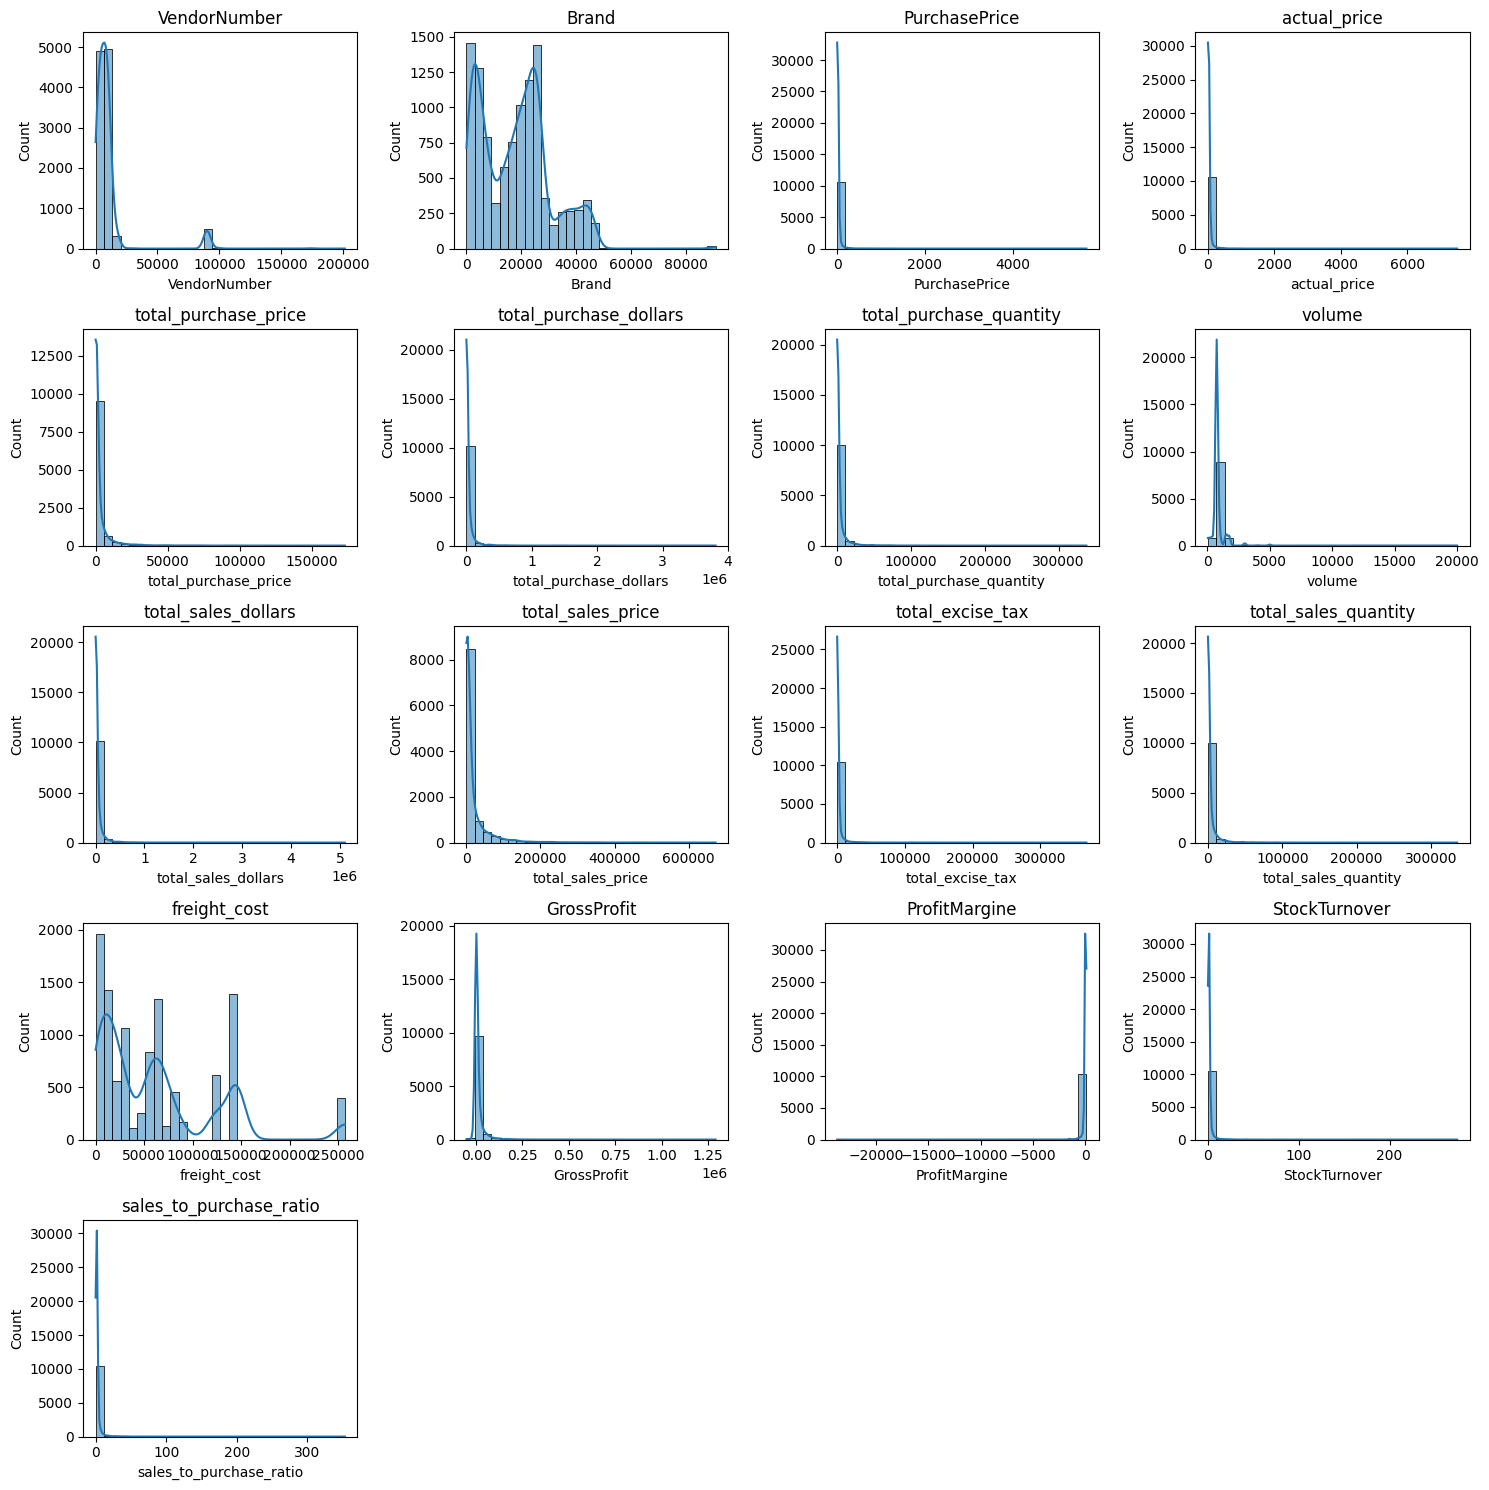

In [19]:
#distribution plot for numerical columns
import math
numerical_cols=df.select_dtypes(include=np.number).columns

total_plots = len(numerical_cols)
cols = 4
rows = math.ceil(total_plots / cols)

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols,i+1) #adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

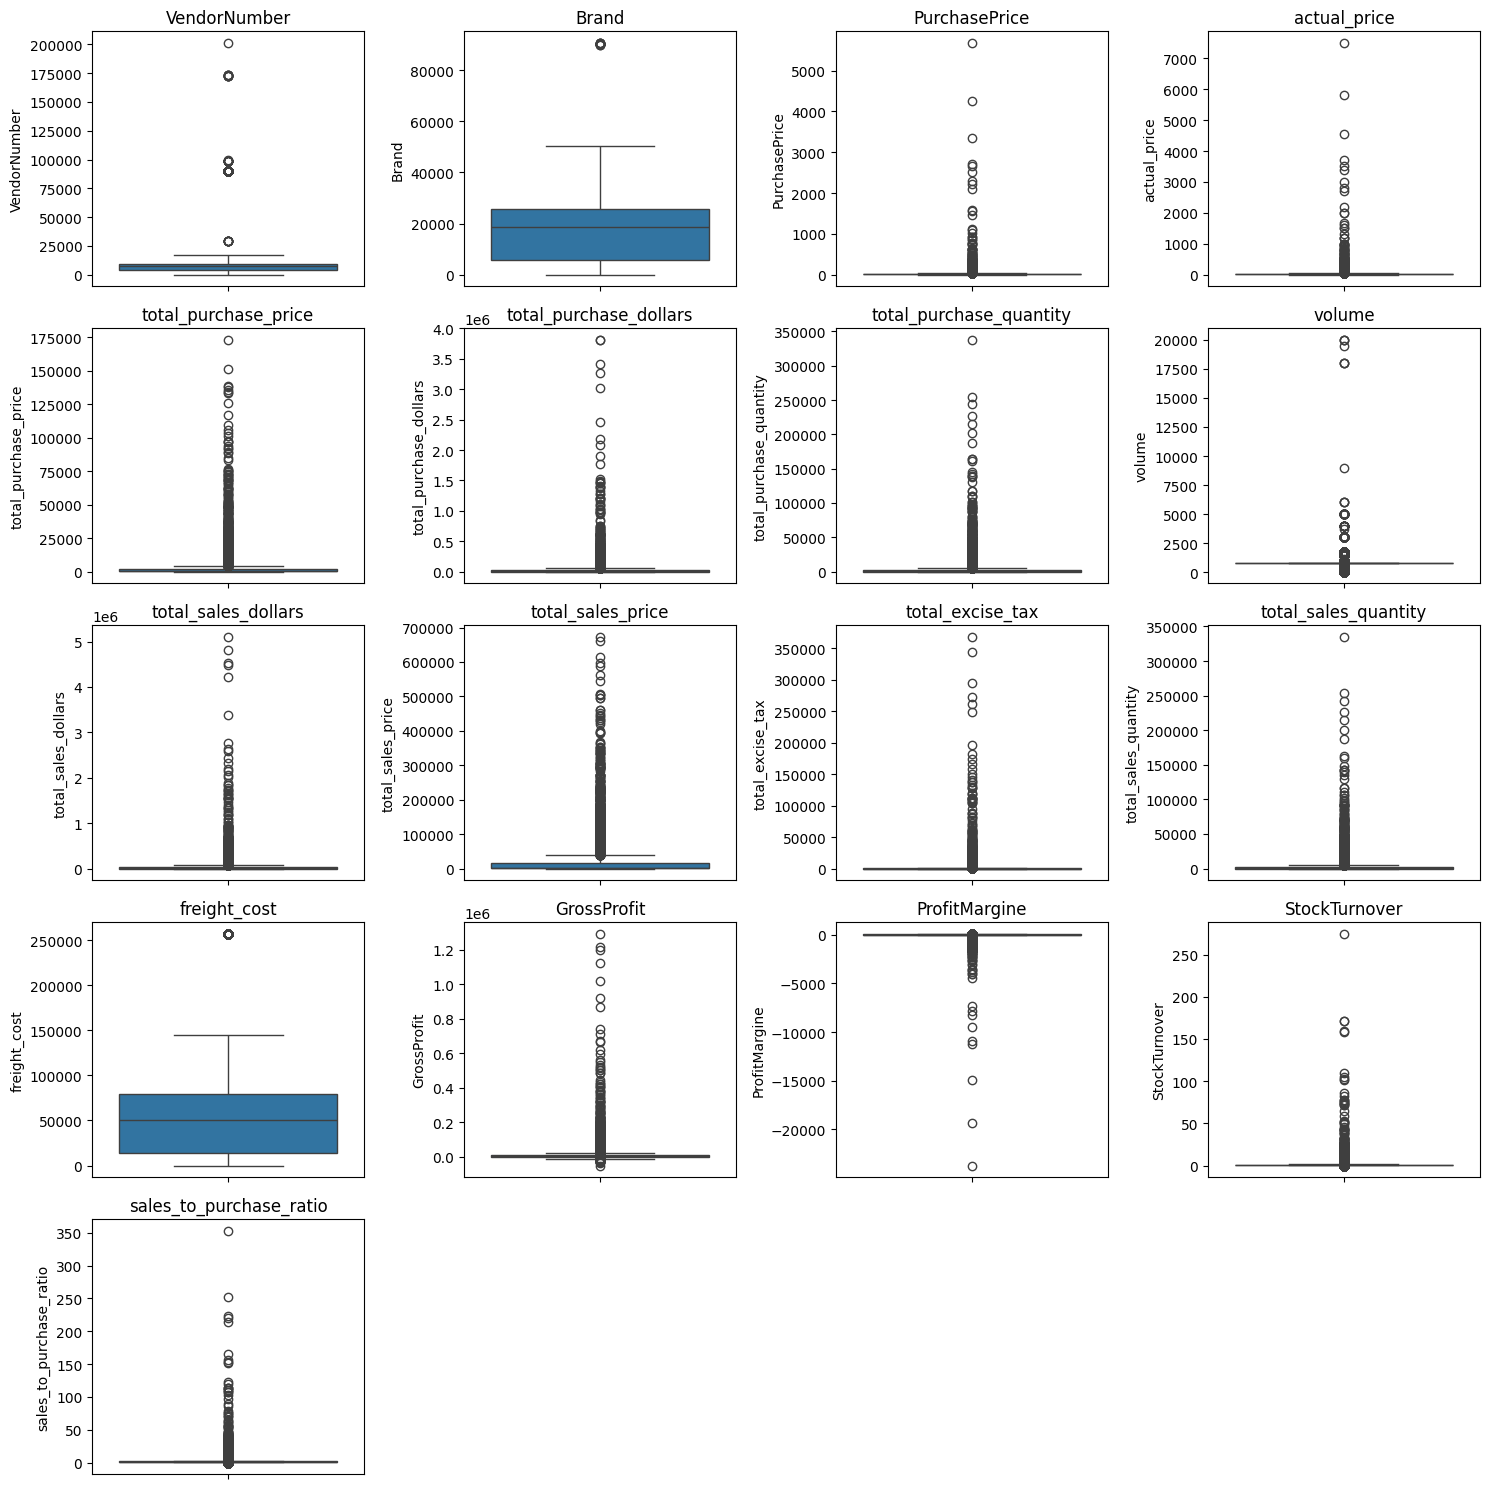

In [21]:
#boxplot
numerical_cols=df.select_dtypes(include=np.number).columns

total_plots = len(numerical_cols)
cols = 4
rows = math.ceil(total_plots / cols)

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols,i+1) #adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [22]:
#total sales quantity, sales dollar=0: some products werepurchased but never sold

#outliers
#max of actual price and purchase price are much higher than the mean, indicating potential premium products
#freight cost: huge variation: inefficient logistics perhaps
#stuck turn over: some products sale extremely fast (0 to 274.5), some remain in stack indefinitely. 
#value more than one indicate that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stocks.

In [24]:
# inconsistent outliers:
df=pd.read_sql_query("""select*from vendor_sales_summaries
where grossprofit>0
and profitmargine>0
and total_sales_quantity>0""", conn)

In [25]:
df

,VendorNumber,VendorName,Brand,description,PurchasePrice,actual_price,total_purchase_price,total_purchase_dollars,total_purchase_quantity,volume,total_sales_dollars,total_sales_price,total_excise_tax,total_sales_quantity,freight_cost,GrossProfit,ProfitMargine,StockTurnover,sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,172961.68,3811251.60,145080,1750.0,5101919.51,672819.31,260999.20,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,150874.14,3804041.22,164038,1750.0,4819073.49,561512.37,294438.66,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,134228.16,3418303.68,187407,1750.0,4538120.60,461140.15,343854.07,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,109535.58,3261197.94,201682,1750.0,4475972.88,420050.01,368242.80,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138476.14,3023206.01,138109,1750.0,4223107.62,545778.28,249587.83,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,1.32,2.64,2,750.0,15.95,10.96,0.55,5.0,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,0.39,2.34,6,50.0,65.66,1.47,7.04,134.0,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,0.74,1.48,2,50.0,1.98,0.99,0.10,2.0,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1.47,1.47,1,200.0,143.28,77.61,15.12,72.0,257032.07,141.81,98.974037,72.000000,97.469388


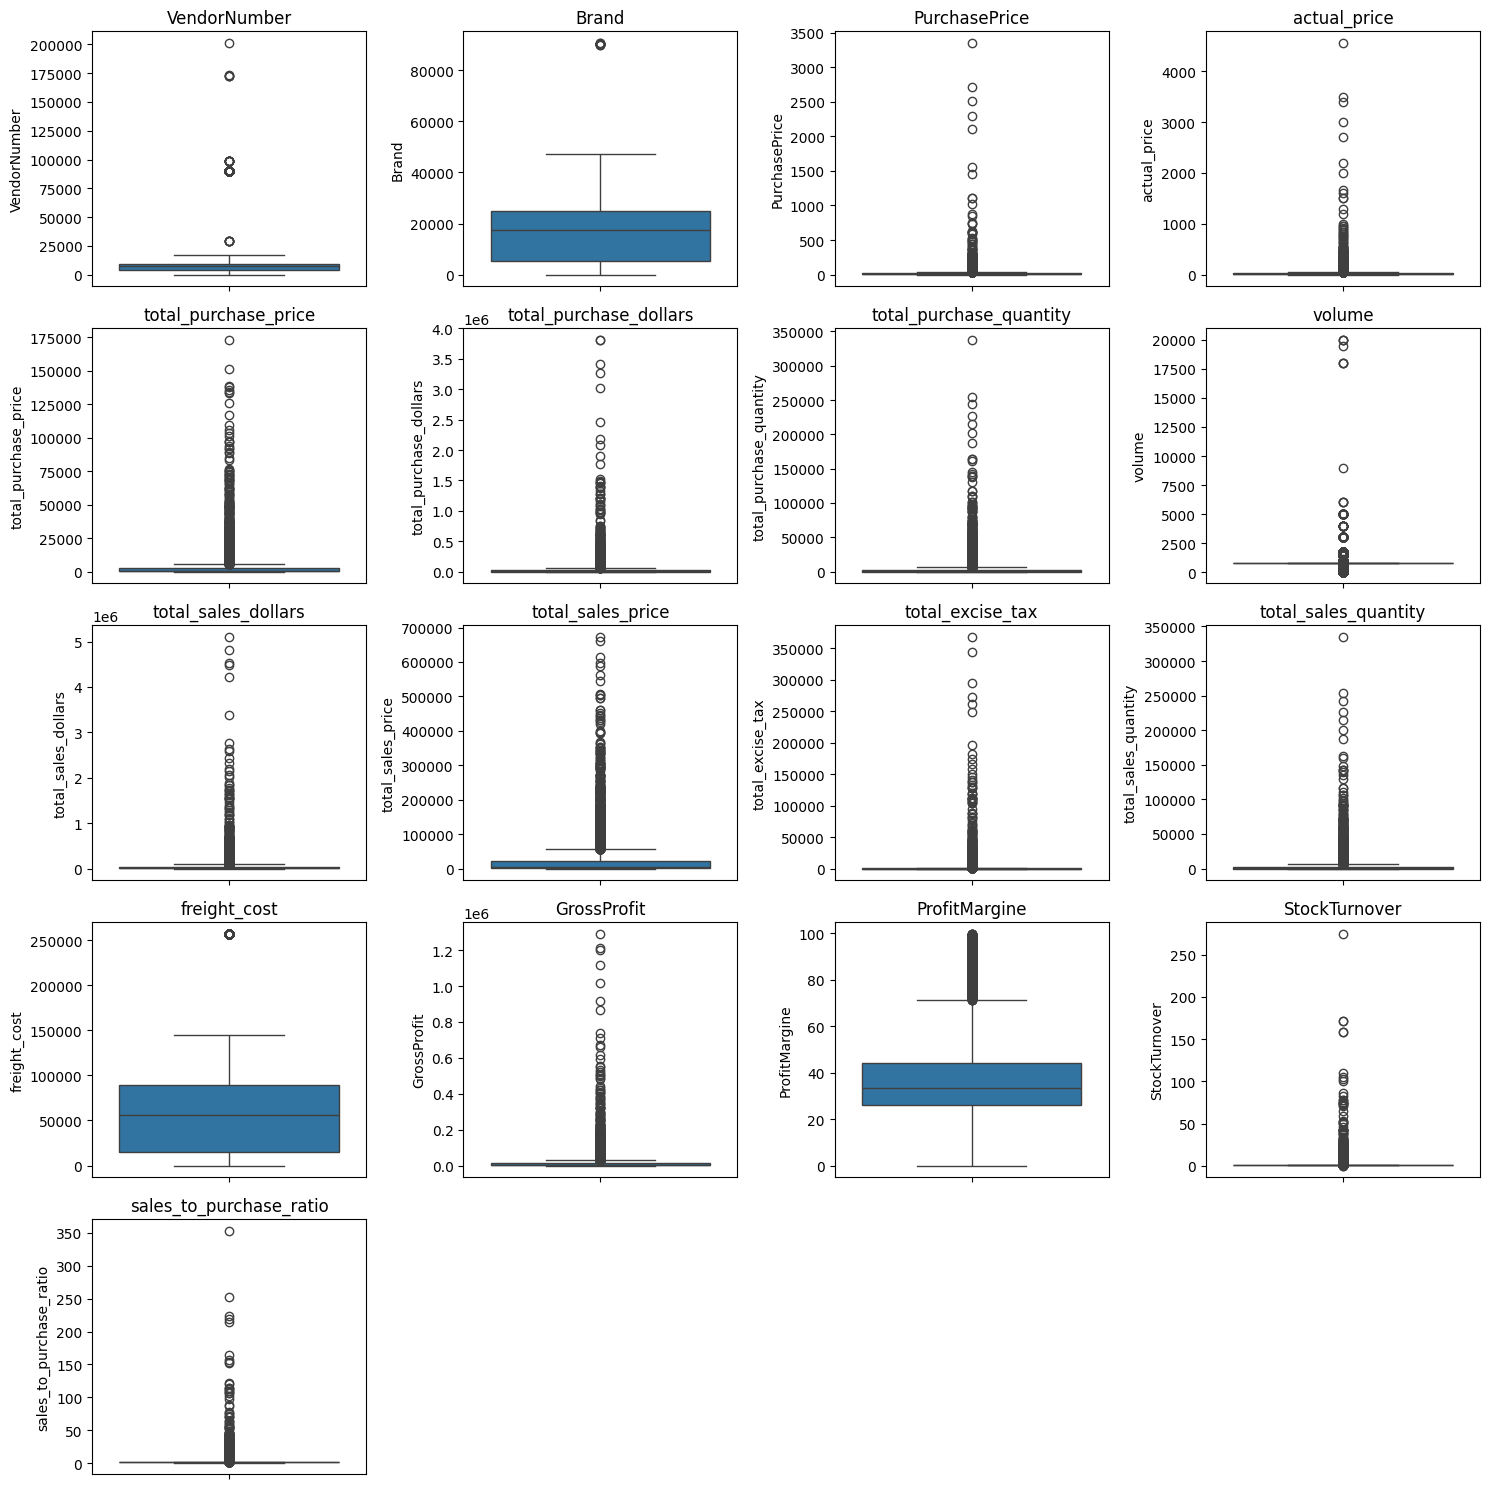

In [26]:
#boxplot
numerical_cols=df.select_dtypes(include=np.number).columns

total_plots = len(numerical_cols)
cols = 4
rows = math.ceil(total_plots / cols)

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols,i+1) #adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

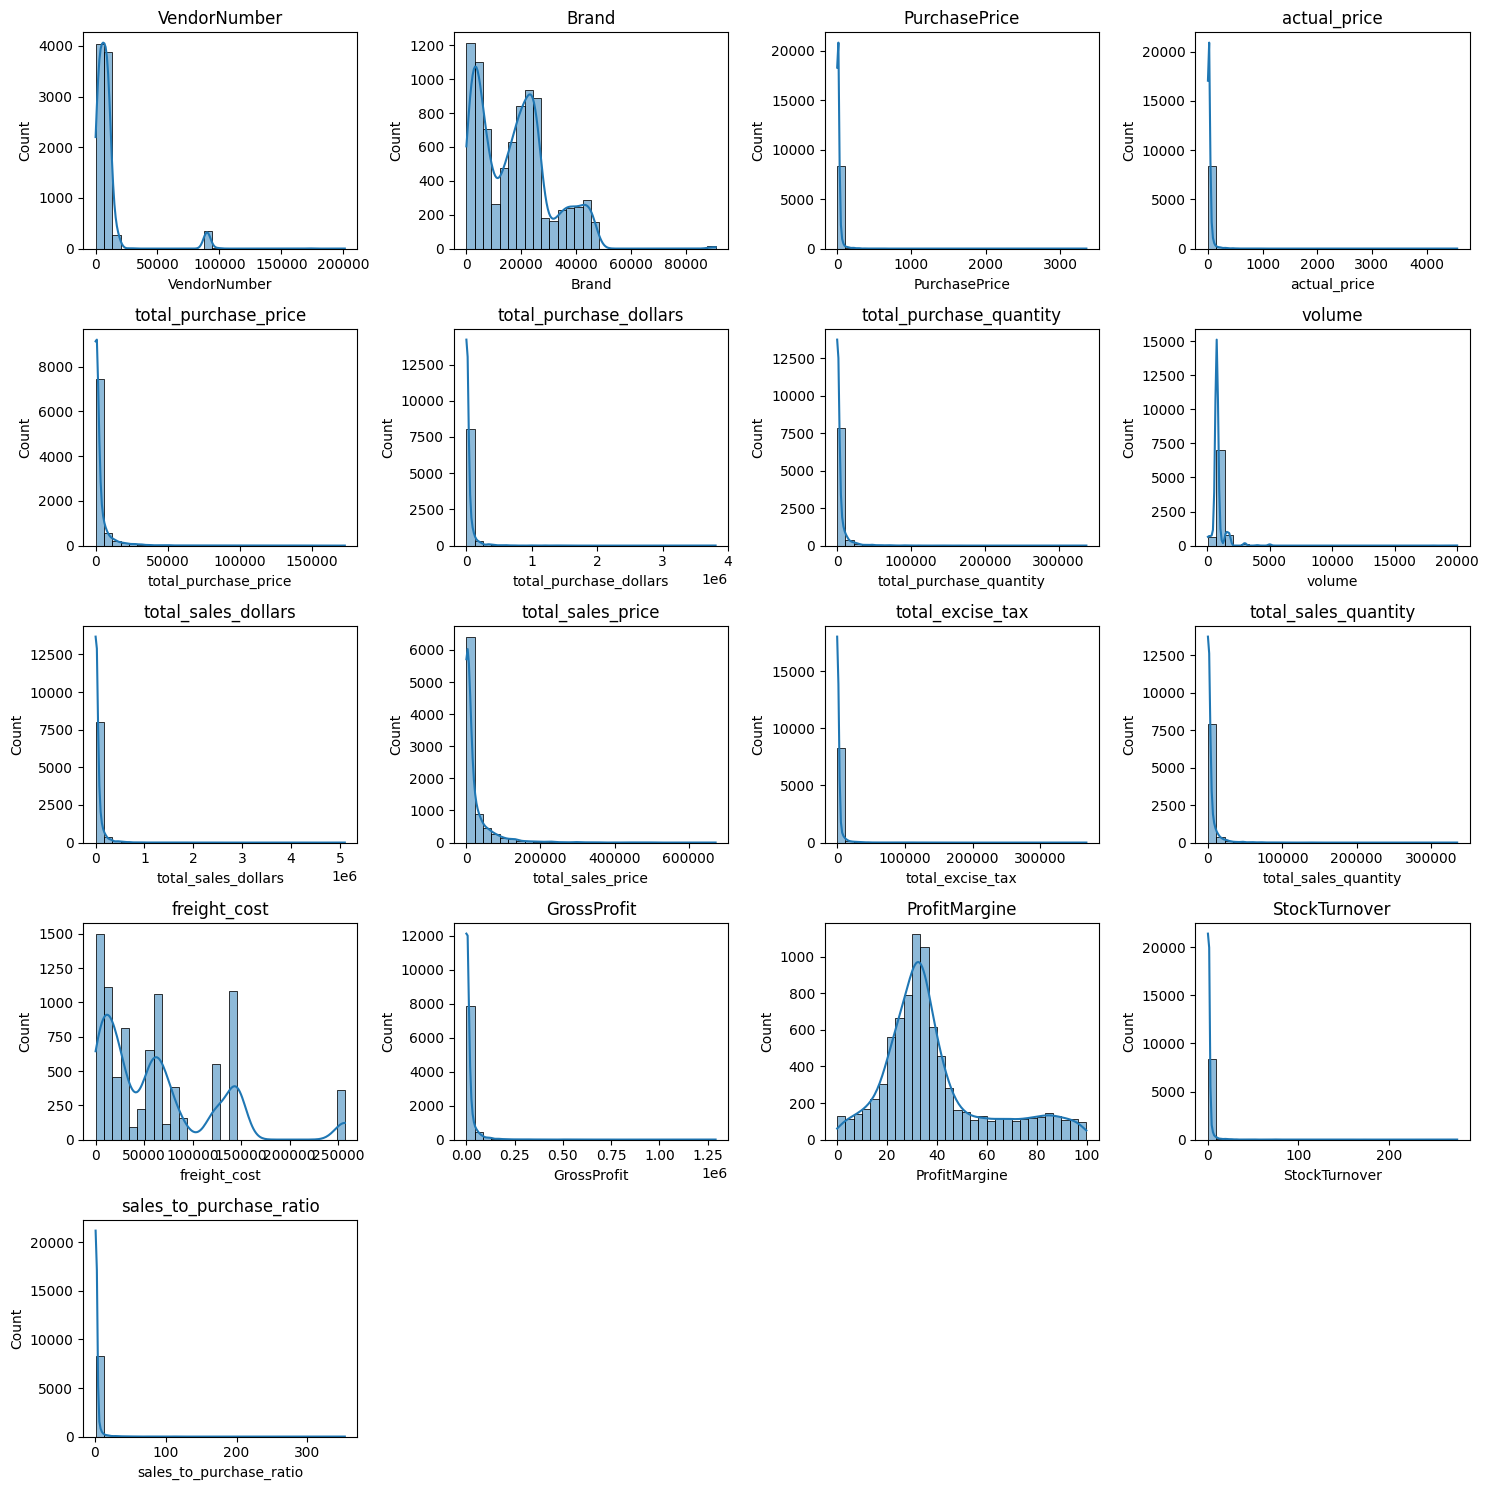

In [27]:
numerical_cols=df.select_dtypes(include=np.number).columns

total_plots = len(numerical_cols)
cols = 4
rows = math.ceil(total_plots / cols)

plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols,i+1) #adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

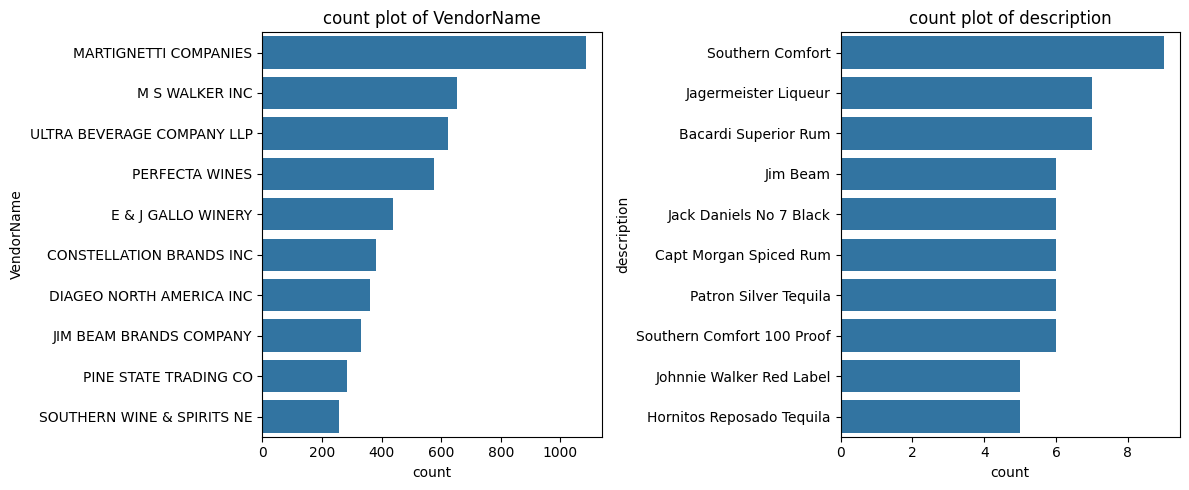

In [30]:
categorial_cols=['VendorName','description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorial_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #top 10
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

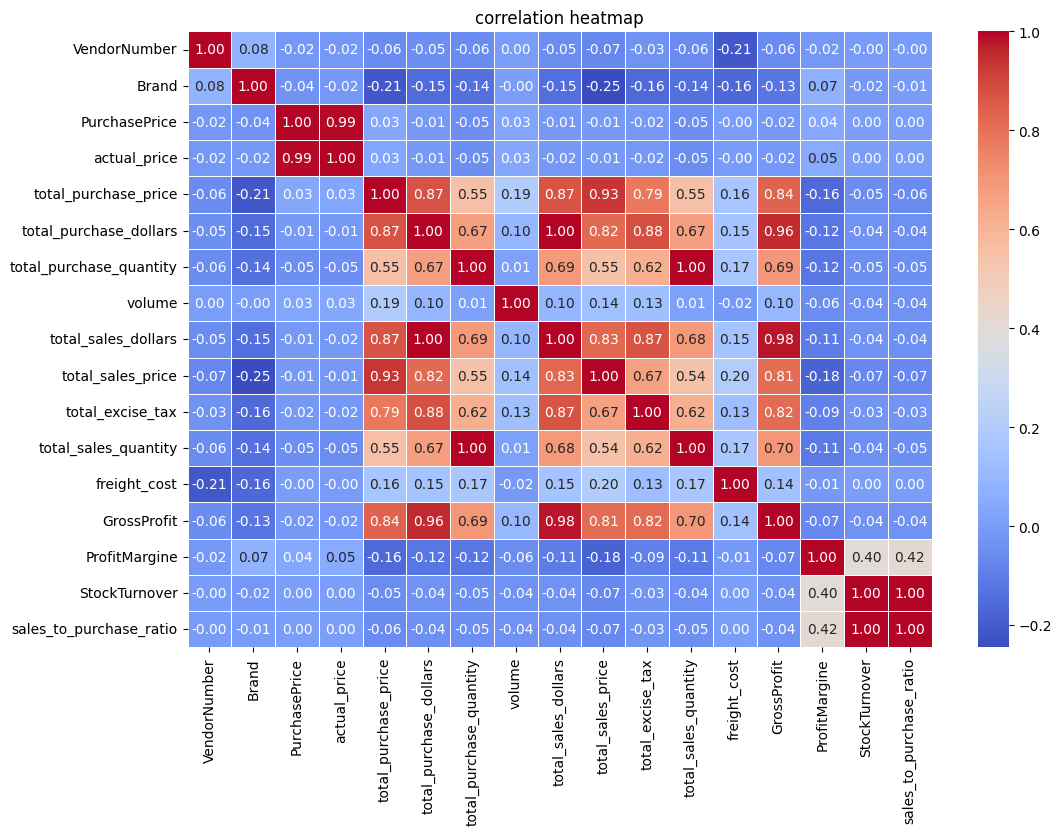

In [34]:
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

strong correlation between total purchase quantity and total sales quantity: efficient inventory turnover
negative correlation between profit margine and total sales price: as sales price increases margine decreases due to competitive pricing pressure
stock turnover has weak corr with gross profit. faster turnover doesnt necessarily mean higher profit
Purchase price has a weak corr with total sales dollars and gross profit: price variation do not significantly impact sales revenue or profit

## Data Analysis
Identify brands that need promotional or pricing adjustments: lower sales performance but higher profit margin 
if margin is high then u can give promotional offers

In [38]:
brand_performance=df.groupby('description').agg({
    'total_sales_dollars': 'sum',
    'ProfitMargine':'mean'}).reset_index() #its percentage so mean more meaningful

In [39]:
low_sales_threshold=brand_performance['total_sales_dollars'].quantile(0.15)
high_margine_threshold=brand_performance['ProfitMargine'].quantile(0.85)

In [40]:
low_sales_threshold

np.float64(560.299)

In [41]:
high_margine_threshold

np.float64(64.97017552750113)

In [45]:
#now we target those brands who have total dollar sales less than 560.299 and margine> 64.97
target_brands=brand_performance[
    (brand_performance['total_sales_dollars']<=low_sales_threshold) &
     (brand_performance['ProfitMargine']>= high_margine_threshold)]

print("Brands with low sales and high margin in profit are:")
display(target_brands.sort_values("total_sales_dollars"))

Brands with low sales and high margin in profit are:


,description,total_sales_dollars,ProfitMargine
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


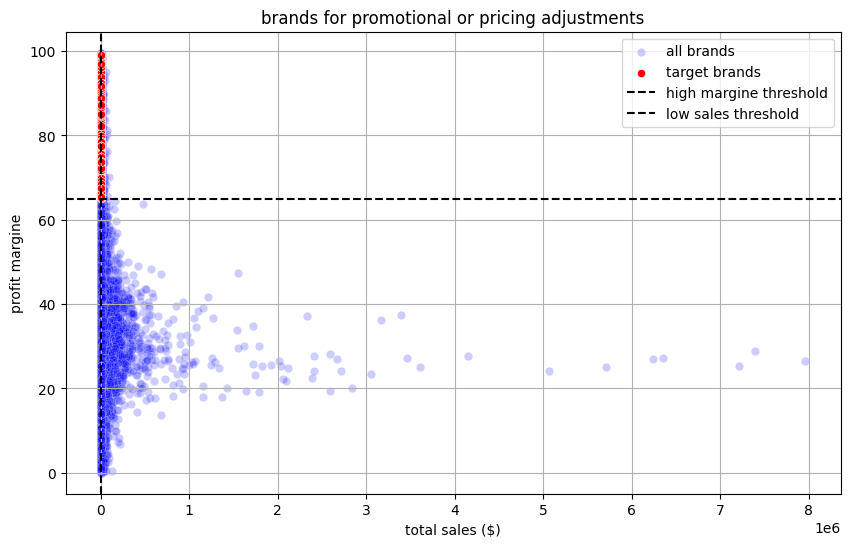

In [51]:
#lets visualize using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='total_sales_dollars', y='ProfitMargine', color='blue', label='all brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='total_sales_dollars', y='ProfitMargine', color='red', label='target brands')

plt.axhline(high_margine_threshold, linestyle='--', color='black', label='high margine threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='low sales threshold')

plt.xlabel('total sales ($)')
plt.ylabel('profit margine')
plt.title('brands for promotional or pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
brand_performance_zoomed=brand_performance[brand_performance['total_sales_dollars']<10000]

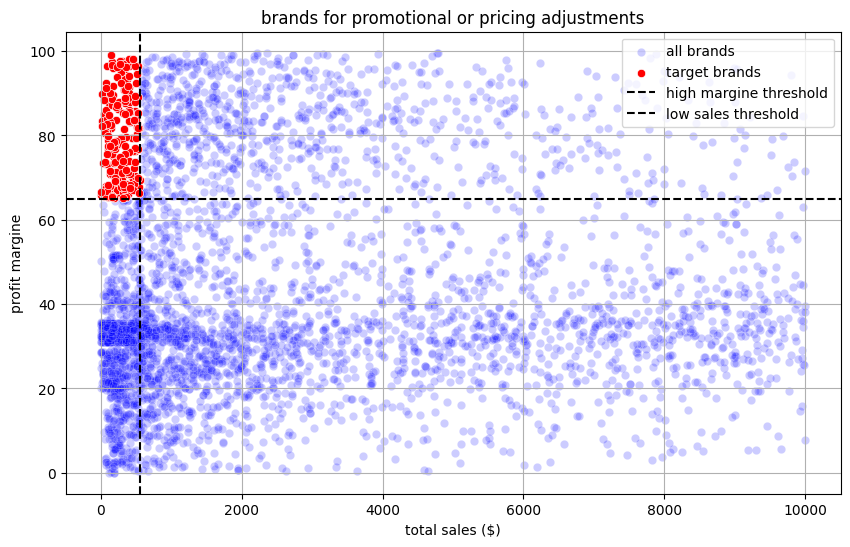

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance_zoomed, x='total_sales_dollars', y='ProfitMargine', color='blue', label='all brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='total_sales_dollars', y='ProfitMargine', color='red', label='target brands')

plt.axhline(high_margine_threshold, linestyle='--', color='black', label='high margine threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='low sales threshold')

plt.xlabel('total sales ($)')
plt.ylabel('profit margine')
plt.title('brands for promotional or pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [55]:
#total sales dollars will be high. we will find top 10
top_vendors=df.groupby('VendorName')['total_sales_dollars'].sum().nlargest(10)
top_brands=df.groupby('description')['total_sales_dollars'].sum().nlargest(10)
print(top_vendors)
print('-'*40)
print(top_brands)

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: total_sales_dollars, dtype: float64
----------------------------------------
description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: total_sales_dollars, dtype: float64


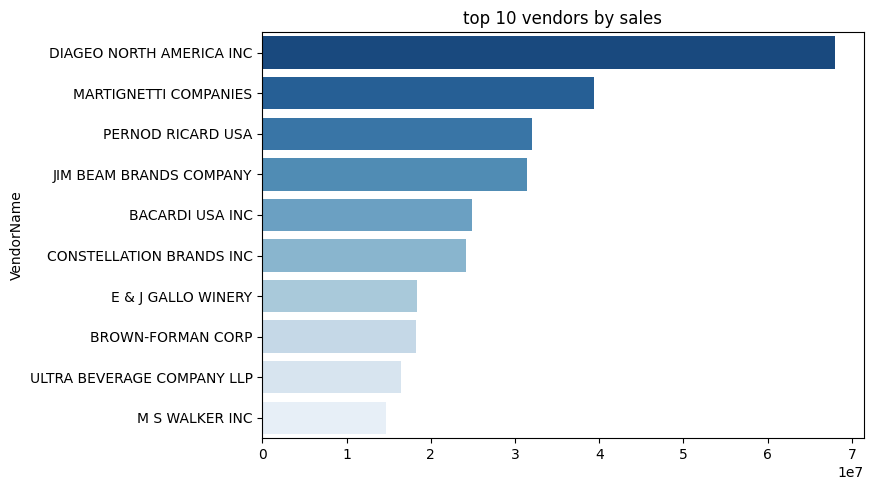

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('top 10 vendors by sales')

plt.tight_layout()
plt.show()

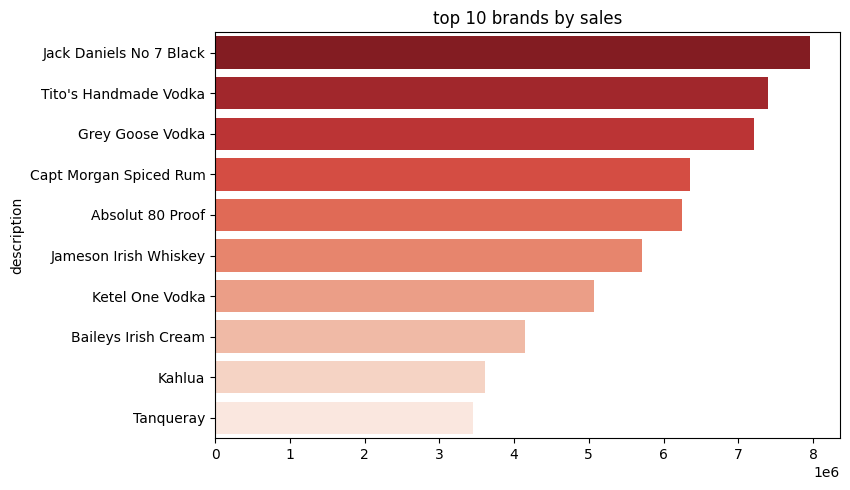

In [62]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1=sns.barplot(y=top_brands.index, x=top_brands.values, palette='Reds_r')
plt.title('top 10 brands by sales')

plt.tight_layout()
plt.show()

which vendor contribute the most to total purchase dollars?

In [70]:
vendor_performance=df.groupby('VendorName').agg({
    'total_purchase_dollars':'sum',
    'GrossProfit':"sum",
    "total_sales_dollars":"sum"}).reset_index()

In [71]:
print(top_vendors_purchase)

                      VendorName  total_purchase_dollars  GrossProfit  \
0        ADAMBA IMPORTS INTL INC                  446.16       258.37   
1           ALISA CARR BEVERAGES                25698.12     78772.82   
2             ALTAMAR BRANDS LLC                11706.20      4000.61   
3      AMERICAN SPIRITS EXCHANGE                  934.08       577.08   
4      AMERICAN VINTAGE BEVERAGE               104435.68     35167.85   
..                           ...                     ...          ...   
114               WEIN BAUER INC                42694.64     13522.49   
115  WESTERN SPIRITS BEVERAGE CO               298416.86    106837.97   
116     WILLIAM GRANT & SONS INC              5876538.26   1693337.94   
117               WINE GROUP INC              5203801.17   3100242.11   
118            ZORVINO VINEYARDS                86122.71     38066.88   

     total_sales_dollars  
0                 704.53  
1              104470.94  
2               15706.81  
3              

In [90]:
vendor_performance['PurchaseContribution%']=vendor_performance['total_purchase_dollars']*100/vendor_performance['total_purchase_dollars'].sum()

In [91]:
top_vendor_performance=(round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2))

In [92]:
top_vendors=top_vendor_performance.head(10)

In [93]:
top_vendors

,VendorName,total_purchase_dollars,GrossProfit,total_sales_dollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
20,CONSTELLATION BRANDS INC,15273708.08,8945037.57,24218745.65,4.97
11,BROWN-FORMAN CORP,13238939.18,5008291.47,18247230.65,4.31
30,E & J GALLO WINERY,12068539.22,6331360.24,18399899.46,3.93
106,ULTRA BEVERAGE COMPANY LLP,11167081.61,5335462.70,16502544.31,3.63
53,M S WALKER INC,9764312.60,4942145.91,14706458.51,3.18


In [94]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [96]:
#out of 119 vendor top 10 vendors contribute 66% of purchase

In [97]:
top_vendors['Cumulative_contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,total_purchase_dollars,GrossProfit,total_sales_dollars,PurchaseContribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30,24.60
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64,40.00
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67,45.67
20,CONSTELLATION BRANDS INC,15273708.08,8945037.57,24218745.65,4.97,50.64
11,BROWN-FORMAN CORP,13238939.18,5008291.47,18247230.65,4.31,54.95
30,E & J GALLO WINERY,12068539.22,6331360.24,18399899.46,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11167081.61,5335462.70,16502544.31,3.63,62.51
53,M S WALKER INC,9764312.60,4942145.91,14706458.51,3.18,65.69


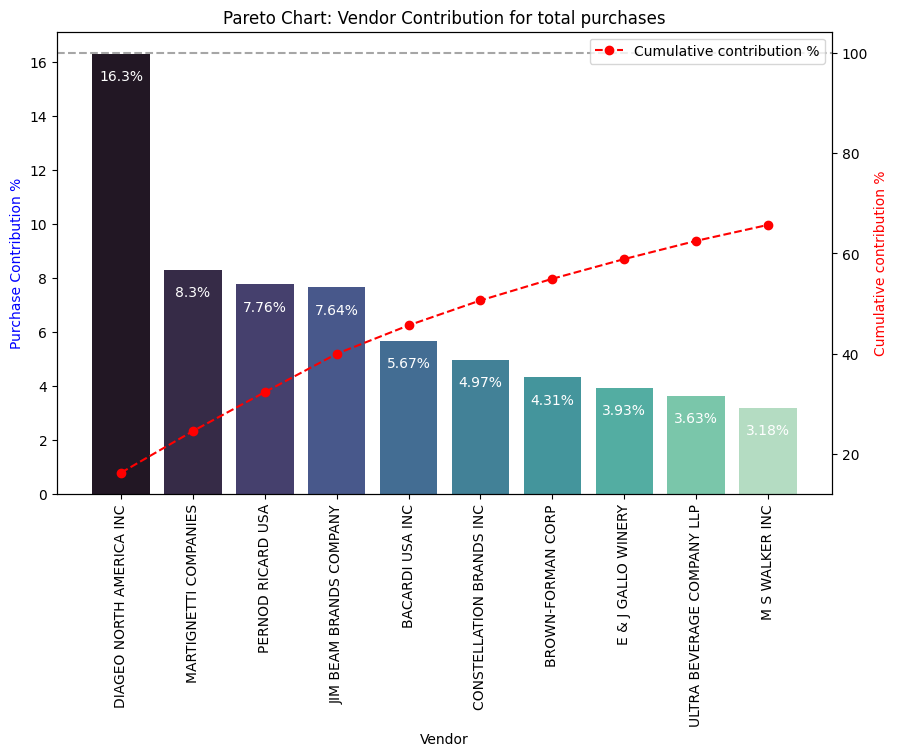

In [104]:
# Pareto chart with individual contribution and cumulative contributions
fig, ax1=plt.subplots(figsize=(10,6))

#bar plot for purchase contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#line plot for cumulative contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative contribution %', color='red')
ax1.set_xlabel('Vendor')
ax1.set_title('Pareto Chart: Vendor Contribution for total purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

how much total procurement is dependent on top vendors

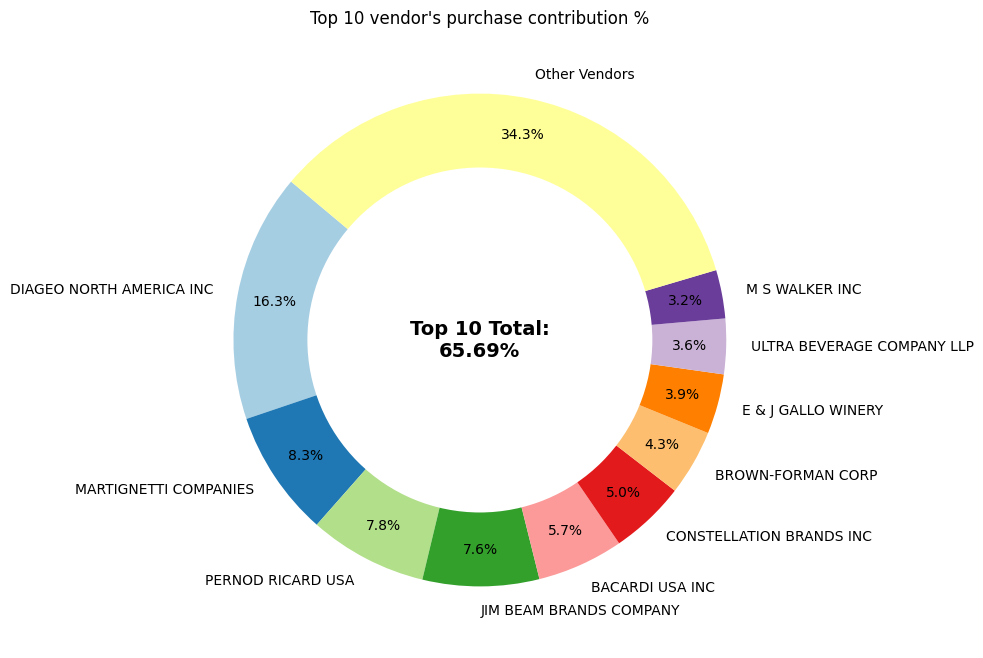

In [107]:
vendors=list(top_vendors["VendorName"].values)
#listing all the vendor names
purchase_contributions= list(top_vendors['PurchaseContribution%'].values)
total_contribution= sum(purchase_contributions)
remaining_contribution=100-total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts= ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

centre_circle=plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 vendor's purchase contribution %")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [110]:
df['unit_purchase_price']=df['total_purchase_dollars']/df['total_purchase_quantity']

In [111]:
df

,VendorNumber,VendorName,Brand,description,PurchasePrice,actual_price,total_purchase_price,total_purchase_dollars,total_purchase_quantity,volume,...,total_sales_price,total_excise_tax,total_sales_quantity,freight_cost,GrossProfit,ProfitMargine,StockTurnover,sales_to_purchase_ratio,unit)purchase_price,unit_purchase_price
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,172961.68,3811251.60,145080,1750.0,...,672819.31,260999.20,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,150874.14,3804041.22,164038,1750.0,...,561512.37,294438.66,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,134228.16,3418303.68,187407,1750.0,...,461140.15,343854.07,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,109535.58,3261197.94,201682,1750.0,...,420050.01,368242.80,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138476.14,3023206.01,138109,1750.0,...,545778.28,249587.83,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,1.32,2.64,2,750.0,...,10.96,0.55,5.0,27100.41,13.31,83.448276,2.500000,6.041667,1.32,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,0.39,2.34,6,50.0,...,1.47,7.04,134.0,50293.62,63.32,96.436186,22.333333,28.059829,0.39,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,0.74,1.48,2,50.0,...,0.99,0.10,2.0,14069.87,0.50,25.252525,1.000000,1.337838,0.74,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1.47,1.47,1,200.0,...,77.61,15.12,72.0,257032.07,141.81,98.974037,72.000000,97.469388,1.47,1.47


In [113]:
#split it into three equal buckets
df["Order_size"]=pd.qcut(df["total_purchase_quantity"],q=3,labels=["small",'medium','large'])

In [116]:
df[['Order_size','total_purchase_quantity']]

,Order_size,total_purchase_quantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8559,small,2
8560,small,6
8561,small,2
8562,small,1


In [117]:
df.groupby('Order_size')[['unit_purchase_price']].mean()

,unit_purchase_price
Order_size,
small,39.068186
medium,15.486414
large,10.777625


large order price-- small unit price (bulk profitable)

vendors with low inventory turnover, indicating excess stock and slow moving products

In [119]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


how much capital is locked in unsold inventory per vendor, and who contributes most

In [120]:
df['Unsold_inventory_value']=(df['total_purchase_quantity']-df['total_sales_quantity'])*df['PurchasePrice']

In [121]:
print('total_unsold capital:', df['Unsold_inventory_value'].sum())

total_unsold capital: 2708177.2199999997


In [122]:
inventory_value_per_vendor=df.groupby('VendorName')['Unsold_inventory_value'].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='Unsold_inventory_value',ascending=False)
inventory_value_per_vendor.head(10)

,VendorName,Unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722209.05
46,JIM BEAM BRANDS COMPANY,554665.63
68,PERNOD RICARD USA,470625.61
116,WILLIAM GRANT & SONS INC,401960.83
30,E & J GALLO WINERY,228282.61
79,SAZERAC CO INC,198436.41
11,BROWN-FORMAN CORP,177733.74
20,CONSTELLATION BRANDS INC,133617.62
61,MOET HENNESSY USA INC,126477.70
77,REMY COINTREAU USA INC,118598.15


In [134]:
df

,VendorNumber,VendorName,Brand,description,PurchasePrice,actual_price,total_purchase_price,total_purchase_dollars,total_purchase_quantity,volume,total_sales_dollars,total_sales_price,total_excise_tax,total_sales_quantity,freight_cost,GrossProfit,ProfitMargine,StockTurnover,sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,172961.68,3811251.60,145080,1750.0,5101919.51,672819.31,260999.20,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,150874.14,3804041.22,164038,1750.0,4819073.49,561512.37,294438.66,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,134228.16,3418303.68,187407,1750.0,4538120.60,461140.15,343854.07,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,109535.58,3261197.94,201682,1750.0,4475972.88,420050.01,368242.80,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138476.14,3023206.01,138109,1750.0,4223107.62,545778.28,249587.83,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,1.32,2.64,2,750.0,15.95,10.96,0.55,5.0,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,0.39,2.34,6,50.0,65.66,1.47,7.04,134.0,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,0.74,1.48,2,50.0,1.98,0.99,0.10,2.0,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1.47,1.47,1,200.0,143.28,77.61,15.12,72.0,257032.07,141.81,98.974037,72.000000,97.469388
